In [1]:
# Inverted Pendulum Robot의 속도 계산 프로그램

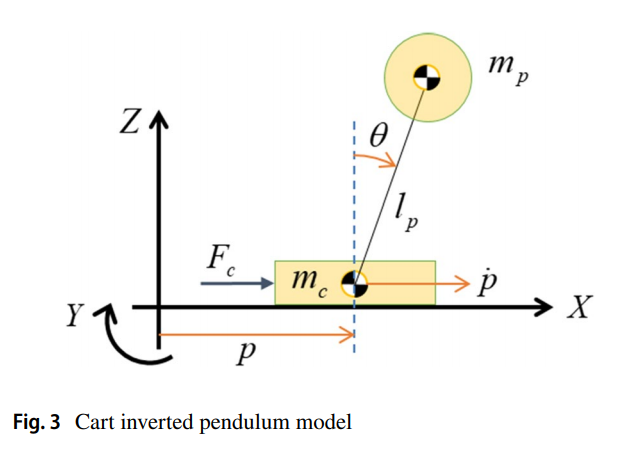

In [2]:
from IPython.display import Image
Image('basic_inv_model.PNG', width=300)

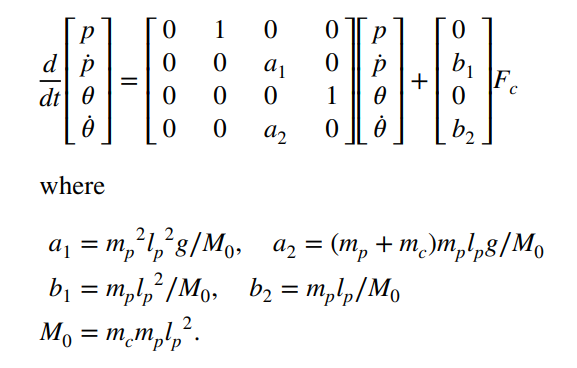

In [3]:
from IPython.display import Image
Image('basic_inv_model_eom.PNG', width=300)

In [4]:
import math
import numpy
import sympy

RPM2RPS = 2*math.pi/60
RPS2DEG = 180/math.pi
INCH2M = 0.0254
MPS2KMH = 3.6

def cal_Kt_from_Kv(Kv):
    RPM2RPS = 2*math.pi/60
    return 1/(Kv*RPM2RPS)

In [5]:
mp,mc,lp,g = sympy.symbols('mp,mc,lp,g')
p,pdd,theta,Fc = sympy.symbols('p,pdd,theta,Fc')

M0 = mc*mp*lp*lp
a1 = mp*mp*lp*lp*g/M0
b1 = mp*lp*lp/M0

pdd = a1*theta + b1*Fc
pdd

Fc/mc + g*mp*theta/mc

In [6]:
# 목표 가속력
target_acc = sympy.symbols('target_acc')
Fc_value = sympy.solve(pdd - target_acc, Fc)
Fc_value

[-g*mp*theta + mc*target_acc]

In [8]:
# 카트질량 500kg, 펜듈럼질량 200kg, 펜듈럼기울어짐 5deg 일때 0.25g의 가속도를 낼 경우 필요한 추력 N
# "흔히 고성능 차량을 타고 가속하는 경우, '시트에 몸이 파묻힌다'는 표현을 한다. 
# 고성능 차량으로 손꼽히는 BMW의 M시리즈 차량으로 가속시 경험할 수 있는 종방향 중력가속도는 0.5~0.6G가량이다.
# [출처: 중앙일보] [박상욱의 모스다] ⑥ 피할 수 없는 '지름신'의 유혹 (하) : '튜닝' 보다 '세팅' 부터"
Fc_required_N = Fc_value[0].subs({g:9.8, mc:500, mp:200, theta:5/RPS2DEG, target_acc:0.25*9.8})
Fc_required_N

1053.95773330456

In [21]:
# 모터 파라미터 설정값
Wheel_Dia_Inch = 20 # inch
Motor_Kv = 150      # Kv = RPM/Volt (Tarot 4008:330kv)
Gear_Ratio = 20
Volt = 50          # Volt

In [22]:
# 세그웨이 형태의 바퀴 2개로 위의 추력을 낼 경우에 바퀴 하나당 내야하는 토크 (Nm)
Wheel_radius_m = Wheel_Dia_Inch/2*INCH2M
T_wheel_Nm = 1/2*Fc_required_N*Wheel_radius_m
# 휠 토크 kg.m 로 환산치 (제네시스 G80이 휠토크가 40 정도수준)
T_wheel_kgm = T_wheel_Nm/9.8
T_wheel_Nm, T_wheel_kgm

(133.852632129679, 13.6584318499672)

In [23]:
# 바퀴에 감속비를 적용하여 모터에서 내야하는 토크 (Nm)
T_motor_Nm = T_wheel_Nm/Gear_Ratio
T_motor_Nm

6.69263160648393

In [24]:
# Check 1 - 플랫폼의 최대속력 (m/s)
V_max_mps = Volt*Motor_Kv/Gear_Ratio*RPM2RPS*Wheel_radius_m
V_max_kmh = V_max_mps*MPS2KMH
V_max_mps, V_max_kmh

(9.974556675147594, 35.908404030531344)

In [25]:
# Check 2 - 위 토크를 만들어 내기 위한 최대 전류 (A)
Kt = cal_Kt_from_Kv(Motor_Kv)
current = T_motor_Nm/Kt
current

105.127611440564

In [26]:
# Check 3 - 모터의 최대 전력 (kW)
Watt_kW = current*Volt/1000
Watt_kW

5.25638057202819